---
# ***Boston Housing Project***

---



## Data Exploration

In [57]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('HousingDataSet.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
# features = data.drop('4', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))
features.head()

Boston housing dataset has 489 data points with 4 variables each.


,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


### Statistics

In [58]:
# TODO: Minimum price of the data
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
maximum_price = np.amax(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# # TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000
Maximum price: $1024800
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


### About Features

1.   RM(Average number of rooms) : The Price of Home will get high, if the value of RM is High.
2.   LSAT(Neighbourhood - Low Class) : For Better Living, the buyer, would definetly want, his/her LSAT to be Low.
3.   PTRATIO(Students/Teachers - Students in Primary and Secondary Schools) : This would depend on the age of the buyer, if the buyer is a middle aged person, he/she would want children from high school and secondary school to be more, but if he/she is a aged person, then they would want more teachers, and less students.





## Developing a Model

### Implementation: Define a Performance Metric

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the coefficient of determination, R2, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is arbitrarily worse than one that always predicts the mean of the target variable.

For the performance_metric function in the code cell below, you will need to implement the following:


*   Use r2_score from sklearn.metrics to perform a performance calculation between y_true and y_predict.
*   Assign the performance score to the score variable.



In [0]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

True Value	Prediction

3.0	2.5 

-0.5	0.0

2.0	2.1

7.0	7.8

4.2	5.3

Run the code cell below to use the performance_metric function and calculate this model's coefficient of determination.

In [60]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


#### This Model is good, because the R2 score. The model predicts arround 92% of the data correctly

### Shuffle  and Split Data

Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:

Use train_test_split from sklearn.model_selection to shuffle and split the features and prices data into training and testing sets.
Split the data into 80% training and 20% testing.
Set the random_state for train_test_split to a value of your choice. This ensures results are consistent.
Assign the train and testing splits to X_train, X_test, y_train, and y_test.

In [61]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing



*   What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

 Answer:  If we don't split our training and testing data, then overfitting is going to happen, that means, we are going to train our model on whole data set and we are going to test our model on the same data set, then the model is going to remember all of the data points and will just predict them, and if we give the model any new data point it would not be able to predict.



## Analyzing Model Performance

In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing 'max_depth' parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R2, the coefficient of determination.

Run the code cell below and use these graphs to answer the following question.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarn

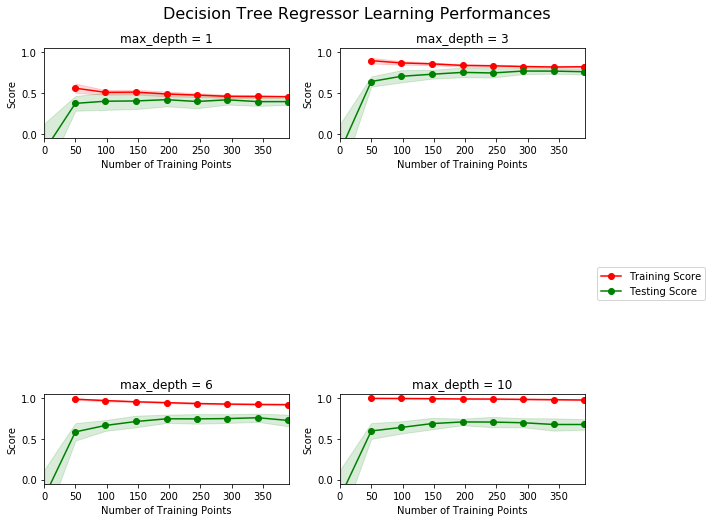

In [62]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

I choose the graph with max-depth of 3.

As more training points are added, its score decreases and seems to level off, while its variance / uncertainty of the curve also decreasing. The testing curve's score also increases as more data points are provided up until approximately 300, as it then tends to level off and run parallel with the training curve.

Given that both training and validation curves have levelled off, providing more training points would not benefit the model with significant improvements but may only increase time consumption for training and testing.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

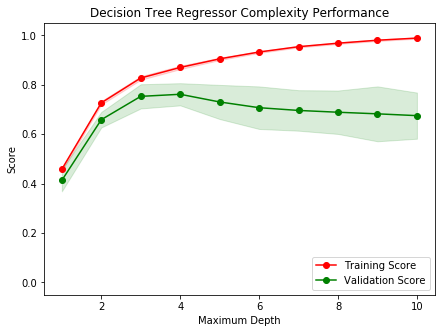

In [63]:
vs.ModelComplexity(X_train, y_train)

## Evaluating Model's Performance

### Implementing: Fitting a Model

For the fit_model function in the code cell below, you will need to implement the following:

Use DecisionTreeRegressor from sklearn.tree to create a decision tree regressor object.

Assign this object to the 'regressor' variable.

Create a dictionary for 'max_depth' with the values from 1 to 10, and assign this to the 'params' variable.

Use make_scorer from sklearn.metrics to create a scoring function object.

Pass the performance_metric function as a parameter to the object.

Assign this scoring function to the 'scoring_fnc' variable.

Use GridSearchCV from sklearn.grid_search to create a grid search object.

Pass the variables 'regressor', 'params', 'scoring_fnc', and 'cv_sets' as parameters to the object.

Assign the GridSearchCV object to the 'grid' variable.

In [0]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Optimal Model

In [66]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


### Predicting the Model

In [67]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted.

***Run the code cell below to run the fit_model function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.***

In [68]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39
